In [28]:
import pandas as pd # manipulação de dado em formato de dataframe
import seaborn as sns # biblioteca de visualização de informações estatísticas
import matplotlib.pyplot as plt # biblioteca de visualização de dados
import statsmodels.api as sm # biblioteca de modelagem estatística
import numpy as np # biblioteca para operações matemáticas multidimensionais
from scipy import stats
from statsmodels.iolib.summary2 import summary_col
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, recall_score
from sklearn.metrics import roc_curve, auc


In [29]:
# Carregar os dados
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

In [30]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [31]:
df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

In [32]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [33]:
#Estatísticas univariadas
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
# In[ ]: Tabela de frequências absolutas da variável 'atrasado'
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [35]:
predictors = df.columns.drop('Survived')
df = df.dropna(subset=predictors)

In [36]:
modelo_titanic = smf.glm('Survived ~  Pclass + Age + SibSp + Parch + Fare + Sex_male + Embarked_Q + Embarked_S', data = df,
                         family=sm.families.Binomial()).fit()

In [37]:
modelo_titanic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      705
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -316.37
Date:                Wed, 24 Jul 2024   Deviance:                       632.73
Time:                        21:10:04   Pearson chi2:                     738.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3717
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.6496      0.635      8.902      0.000       4.406       6.893
Sex_male[T.True]      -2.6457      0.222    -11.915      0.000      -3.081      -2.210
Embarked_Q[T.True]    -0.8340      0.600     -1.389      0.165      -2.010       0.343
Embarked_S[T.True]    -0.4104      0.270     -1.521      0.128      -0.939       0.118
Pclass                -1.2005      0.165     -7.288      0.000      -1.523      -0.878
Age                   -0.0432      0.008     -5.254      0.000      -0.059      -0.027
SibSp                 -0.3638      0.129     -2.816      0.005      -0.617      -0.111
Parch                 -0.0617      0.124     -0.498      0.618      -0.305       0.181
Fare                   0.0014      0.003      0.568      0.570      -0.004       0.006
======================================================================================
"""

In [38]:
summary_col([modelo_titanic],
            model_names=["MODELO"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs)),
                'Log-lik':lambda x: "{:.2f}".format(x.llf)
        })

,MODELO
Intercept,5.6496***
,(0.6346)
Sex_male[T.True],-2.6457***
,(0.2220)
Embarked_Q[T.True],-0.8340
,(0.6003)
Embarked_S[T.True],-0.4104
,(0.2697)
Pclass,-1.2005***
,(0.1647)


In [39]:
modelo_testeparch = smf.glm('Survived ~  Parch ', data = df,
                         family=sm.families.Binomial()).fit()

In [40]:
summary_col([modelo_testeparch],
            model_names=["MODELO"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs)),
                'Log-lik':lambda x: "{:.2f}".format(x.llf)
        })

,MODELO
Intercept,-0.4767***
,(0.0862)
Parch,0.2202**
,(0.0898)
N,714
Log-lik,-479.19


In [41]:
modelo_testefare = smf.glm('Survived ~  Fare ', data = df,
                         family=sm.families.Binomial()).fit()

In [42]:
summary_col([modelo_testefare],
            model_names=["MODELO"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs)),
                'Log-lik':lambda x: "{:.2f}".format(x.llf)
        })

,MODELO
Intercept,-0.8968***
,(0.1076)
Fare,0.0160***
,(0.0025)
N,714
Log-lik,-450.63


In [43]:
modelo_titanic = smf.glm('Survived ~  Pclass + Age + SibSp + Sex_male', data = df,
                         family=sm.families.Binomial()).fit()

In [44]:
summary_col([modelo_titanic],
            model_names=["MODELO"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs)),
                'Log-lik':lambda x: "{:.2f}".format(x.llf)
        })

,MODELO
Intercept,5.6008***
,(0.5434)
Sex_male[T.True],-2.6235***
,(0.2145)
Pclass,-1.3174***
,(0.1409)
Age,-0.0444***
,(0.0082)
SibSp,-0.3761***
,(0.1211)


In [45]:
df['phat'] = modelo_titanic.predict()

In [46]:
df.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,phat
0,1,0,3,22.0,1,0,7.2500,True,False,True,0.088878
1,2,1,1,38.0,1,0,71.2833,False,False,False,0.902094
2,3,1,3,26.0,0,0,7.9250,False,False,True,0.621201
3,4,1,1,35.0,1,0,53.1000,False,False,True,0.913241
4,5,0,3,35.0,0,0,8.0500,True,False,True,0.073898
6,7,0,1,54.0,0,0,51.8625,True,False,True,0.323702
7,8,0,3,2.0,3,1,21.0750,True,False,True,0.100475
8,9,1,3,27.0,0,2,11.1333,False,False,True,0.610702
9,10,1,2,14.0,1,0,30.0708,False,False,False,0.877455
10,11,1,3,4.0,1,1,16.7000,False,False,True,0.749321


In [47]:
# In[ ]: Construção de função para a definição da matriz de confusão
from sklearn.metrics import confusion_matrix, accuracy_score,\
    ConfusionMatrixDisplay, recall_score

def matriz_confusao(observado,predicts,cutoff):
    
    values = predicts.values
    
    predicao_binaria = []
    
    for item in values:
        if item >= cutoff:
            predicao_binaria.append(1)
        else:
            predicao_binaria.append(0)
    
    cm = confusion_matrix(observado, predicao_binaria)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    
    sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
    especificidadee = recall_score(observado, predicao_binaria, pos_label=0)
    acuracia = accuracy_score(observado, predicao_binaria)

    #Visualizando os principais indicadores desta matriz de confusão
    indicadores = pd.DataFrame({'Sensitividade':[sensitividade],
                                'Especificidade':[especificidadee],
                                'Acurácia':[acuracia]})
    return indicadores

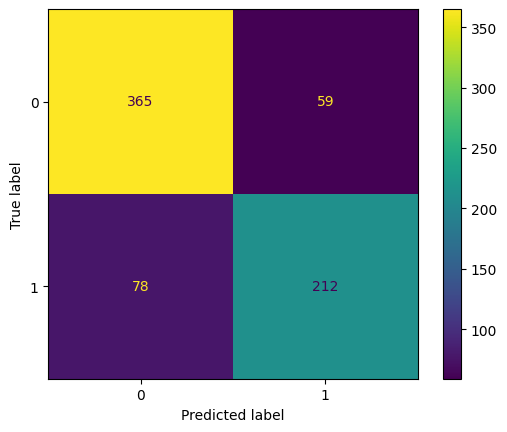

,Sensitividade,Especificidade,Acurácia
0,0.731034,0.860849,0.808123


In [48]:
# In[ ]: Matrizes de confusão propriamente ditas

#Matriz de confusão para cutoff = 0.5
matriz_confusao(observado=df['Survived'],
               predicts=df['phat'],
               cutoff=0.5)

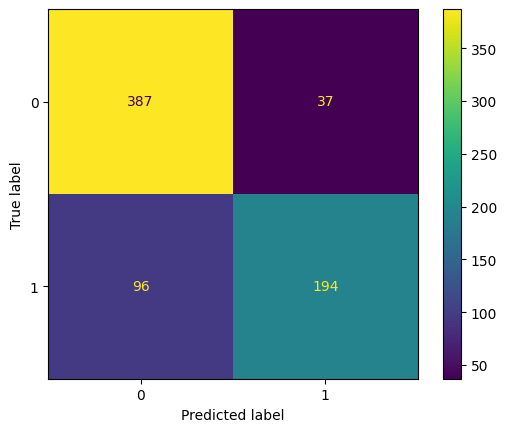

,Sensitividade,Especificidade,Acurácia
0,0.668966,0.912736,0.813725


In [49]:
# In[ ]: Matrizes de confusão propriamente ditas

#Matriz de confusão para cutoff = 0.5
matriz_confusao(observado=df['Survived'],
               predicts=df['phat'],
               cutoff=0.6)

In [50]:
# In[ ]: Igualando critérios de especificidade e de sensitividade

#Tentaremos estabelecer um critério que iguale a probabilidade de
#acerto daqueles que chegarão atrasados (sensitividade) e a probabilidade de
#acerto daqueles que não chegarão atrasados (especificidade).

#ATENÇÃO: o que será feito a seguir possui fins didáticos, apenas. DE NENHUMA
#FORMA o procedimento garante a maximização da acurácia do modelo!

#Criação da função 'espec_sens' para a construção de um dataset com diferentes
#valores de cutoff, sensitividade e especificidade:
def espec_sens(observado,predicts):
    
    # adicionar objeto com os valores dos predicts
    values = predicts.values
    
    # range dos cutoffs a serem analisados em steps de 0.01
    cutoffs = np.arange(0,1.01,0.01)
    
    # Listas que receberão os resultados de especificidade e sensitividade
    lista_sensitividade = []
    lista_especificidade = []
    
    for cutoff in cutoffs:
        
        predicao_binaria = []
        
        # Definindo resultado binário de acordo com o predict
        for item in values:
            if item >= cutoff:
                predicao_binaria.append(1)
            else:
                predicao_binaria.append(0)
                
        # Cálculo da sensitividade e especificidade no cutoff
        sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
        especificidadee = recall_score(observado, predicao_binaria, pos_label=0)
        
        # Adicionar valores nas listas
        lista_sensitividade.append(sensitividade)
        lista_especificidade.append(especificidadee)
        
    # Criar dataframe com os resultados nos seus respectivos cutoffs
    resultado = pd.DataFrame({'cutoffs':cutoffs,'sensitividade':lista_sensitividade,'especificidade':lista_especificidade})
    return resultado

In [51]:
# In[ ]: Até o momento, foram extraídos 3 vetores: 'sensitividade',
#'especificidade' e 'cutoffs'. Assim, criamos um dataframe que contém
#os vetores mencionados
dados_plotagem = espec_sens(observado = df['Survived'],
                            predicts = df['phat'])
dados_plotagem

,cutoffs,sensitividade,especificidade
0,0.00,1.000000,0.000000
1,0.01,1.000000,0.000000
2,0.02,1.000000,0.004717
3,0.03,1.000000,0.016509
4,0.04,1.000000,0.037736
...,...,...,...
96,0.96,0.055172,0.997642
97,0.97,0.017241,0.997642
98,0.98,0.000000,1.000000
99,0.99,0.000000,1.000000


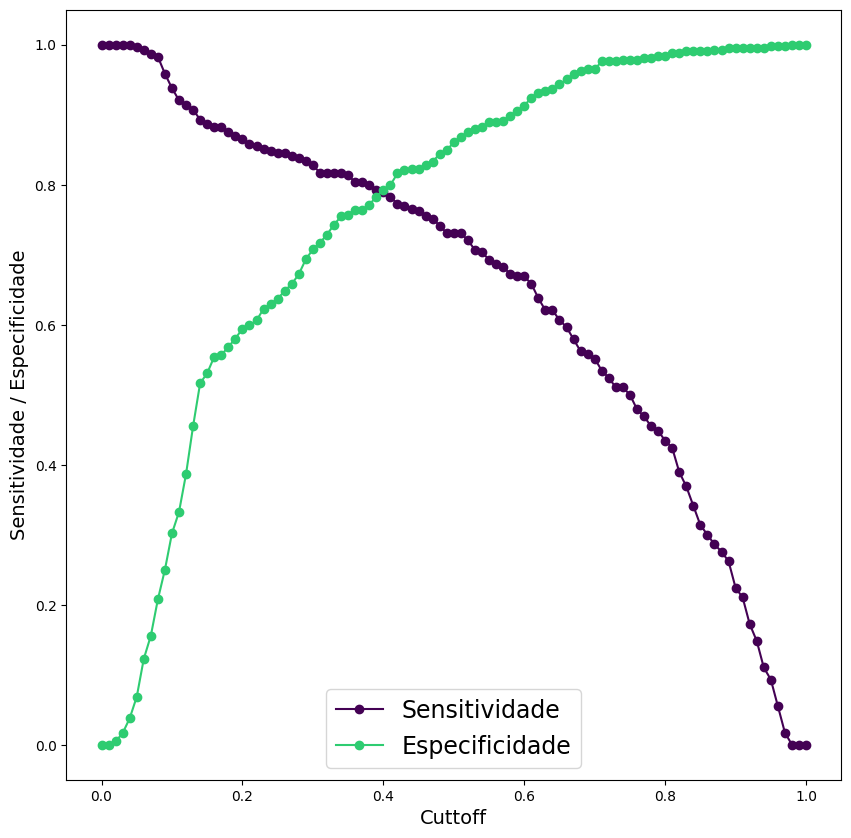

In [52]:
# In[ ]: Visualizando o novo dataframe 'dados_plotagem' e plotando os dados
#em um gráfico que mostra a variação da especificidade e da sensitividade
#em função do cutoff

plt.figure(figsize=(10,10))
plt.plot(dados_plotagem.cutoffs,dados_plotagem.sensitividade, '-o',
         color="#440154FF")
plt.plot(dados_plotagem.cutoffs,dados_plotagem.especificidade, '-o',
         color="#2ecc71")
plt.legend(['Sensitividade', 'Especificidade'], fontsize=17)
plt.xlabel("Cuttoff", fontsize=14)
plt.ylabel("Sensitividade / Especificidade", fontsize=14)
plt.show()

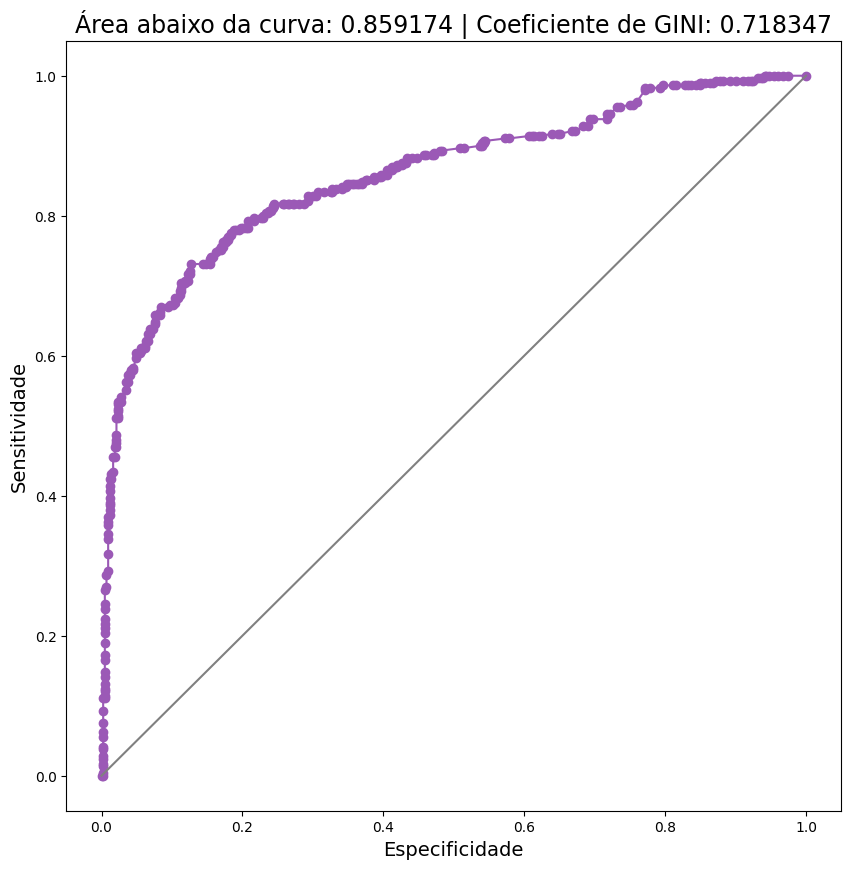

In [53]:
# In[ ]: Construção da curva ROC

from sklearn.metrics import roc_curve, auc
#Função 'roc_curve' do pacote 'metrics' do sklearn
fpr, tpr, thresholds = roc_curve(df['Survived'],df['phat'])
roc_auc = auc(fpr, tpr)
#Cálculo do coeficiente de GINI
gini = (roc_auc - 0.5)/(0.5)
#Plotando a curva ROC
plt.figure(figsize=(10,10))
plt.plot(fpr,tpr, '-o', color="#9b59b6")
plt.plot(fpr,fpr, color='gray')
plt.title("Área abaixo da curva: %f" % roc_auc +
          " | Coeficiente de GINI: %f" % gini, fontsize=17)
plt.xlabel("Especificidade", fontsize=14)
plt.ylabel("Sensitividade", fontsize=14)
plt.show()